## **Network Science Project - The Granovetter Assumption**
**ELTE University - Faculty of Informatics**

* Student: **Mohamed Aharrat**
* Neptun ID: **AHR9OI**
* Specialization: **Data Science**
* Academic year: **2021/2022**

## Introduction

The Granovetter hypothesis assumes that the function of strong and weak ties are quite different in social networks: strong ties usually occur within groups or communities and their role is to hold the given cluster together, whereas weak ties usually appear in between commu- nities, and their role is to hold the different groups (and thereby, the whole system) together. <br/><br/>
An interesting related empirical study on a large phone call network is presented in the following paper: https://www.pnas.org/content/pnas/104/18/7332.full.pdf , where it is shown that the critical point of the percolation is at different value of
the fraction of the removed links if we remove the links in descending or in increasing order of the link weights. Furthermore, a quantity O measuring the overlap between the neighbourhoods of the link endpoints is also introduced, and again, the disassembly of the giant component into small fragmented components is different if we remove the links according to descending or increasing order given by O. <br/><br/>
The main aim of this project is to repeat the link removal experiments shown in the paper on the weighted co-authorship network between scientists that can be downloaded from http://www-personal.umich.edu/~mejn/netdata/netscience.zip

## Brief literature review

The paper [1] <a href="https://www.pnas.org/content/pnas/104/18/7332.full.pdf"><i>Structure and tie strengths in mobile communication networks</i></a> by *JP. Onnela et all*. conducts an empirical study to examine the communication patterns of millions of mobile phone users by observing the coupling between interaction strengths and the network’s local structure with the counterintuitive consequence that social networks are robust to the removal
of the strong ties but fall apart after a phase transition if the weak
ties are removed.

The study starts by transforming a large phone log into a network representation that captures the characteristics of the underlying communication network. This is done by recursively connecting each two users $A$ and $B$ who had at least one reciprocated pair of calls with an undirected link. The resulting network contains $4.6$x$10^6$ nodes and $7.0$x$10^6$ links.
Upon analyzing the network, they found out that the network has a skewed distribution indicating that only a minority talks with dozens of people. 

Afterwards, they explore the network’s ability to withstand the removal of either strong or weak ties by monitoring the percolation transition when removing ties according to their strengths (weights) or the calculated overlap.
It is worth mentioning that in most technological and biological networks the strong ties are believed to play a more important structural role than the weak ties, and in such systems the removal of the strong ties leads to the network’s collapse. However, in the study, the removal of the weak ties leads to a sudden, phase transition-driven collapse of the whole network. In contrast, the removal of the strong ties results only in the network’s gradual shrinking but not its collapse. This supports the Granovetter hypothesis which states that the strength of a tie between A and B increases with the overlap of their friendship circles, resulting in the importance of weak ties in connecting communities.

## Dataset: Scientific Colabration Network

We will be experimenting with <a href="http://www-personal.umich.edu/~mejn/netdata/">the coauthorship network of scientists</a>. working on network theory and experiment as compiled from the bibliographies of two review articles on networks, M.E.J. Newman, SIAM Review 45, 167-256 (2003) and S. Boccaletti et al <br/>
The network has a total of 1589 scientists in it, from a broad variety of fields.
The vertices of the network represent all individuals who are authors of papers cited in the bibliographies of either of two recent reviews on networks research [1, 2] and edges join every pair of individuals whose names appear together as authors of a paper or papers in those bibliographies. A small number of additional references were added by hand to bring the network
up to date.

The network is weighted, with varying weights assigned as
described in M.E.J. Newman, Phys. Rev. E 64, 016132 (2001).
The weights represent the strength of scientific collaboration [6].

## Import packages and load data

In [1]:
!pip install networkx

In [2]:
import os
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math

Mount GDrive and import dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

PATH = os.path.join('/content/drive/My Drive/Datasets/', 'netscience.gml')
!cp "{PATH}" .

Mounted at /content/drive


In [5]:
G = nx.read_gml('netscience.gml')

## Social Network Analysis

Social network analysis (SNA) is the mapping and measuring of relationships and flows between people, groups, organizations, computers, web sites, and other information knowledge processing entities. The nodes in the network are the people and groups while the links show relationships or flows between the nodes. SNA provides both a visual and a mathematical analysis of human relationships [4-5].

Let's get an idea of what the network actually looks like

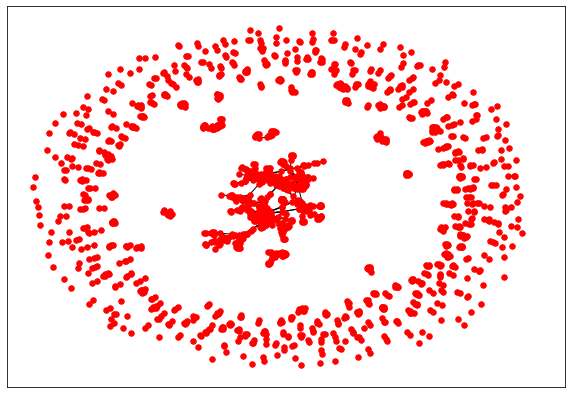

In [ ]:
plt.figure(figsize = (10, 7))
nx.draw_networkx(G, node_size=30, node_color='red', with_labels=False)

We can observe that the network contains one giant component and many smaller components

According to the code below, the network contains **1589** nodes and **2742** links with a density of **0.21%**

In [6]:
# Number of nodes
N = G.number_of_nodes()
# Number of links
M = G.number_of_edges()
# The density for undirected graphs (actual connections/potential connections)
d = (2*M) / (N*(N-1))
# Number of components
comp_n = len(list(nx.connected_components(G)))

print(f'[x] Number of nodes: {N}')
print(f'[x] Number of edges: {M}')
print(f'[x] Network density: {d}')
print(f'[x] Number of components: {comp_n}')

[x] Number of nodes: 1589
[x] Number of edges: 2742
[x] Network density: 0.0021733168683312383
[x] Number of components: 396


Concerning the degree distribution of the network, we observe that there are plenty of node with a degree $k$ lower than 5. And the number of nodes reduces if $k$ increases. 

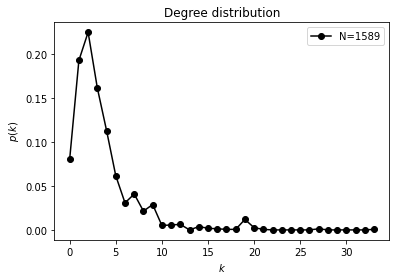

In [8]:
# Degree distribution
k_list = [G.degree(node) for node in G.nodes]
k_hist, k_bins = np.histogram(k_list, range(0, max(k_list) + 1), density=True)

plt.plot(k_bins[:-1], k_hist, '-o', color='black', label = f'N={str(N)}')
plt.xlabel('$k$')
plt.ylabel('$p(k)$')
plt.title('Degree distribution')
plt.legend()
plt.show()

In [9]:
node_degrees = sorted([(node, val) for (node, val) in G.degree()], key=lambda t: t[1], reverse=True)

print(f'[x] The node with the highest degree is {node_degrees[0]}')

[x] The node with the highest degree is ('BARABASI, A', 34)


Above, we can see that the highest degree is $k$ = 34 and it belongs to the node '*BARABASI, A*'. **This indicates that Barabási-Albert is set to have the highest number of co-authorships in the network**.

Below, we calculate the centralities of the network using *networkx* implementations, then we compare between each top 10.

In [68]:
import pandas as pd
from networkx.algorithms.centrality import load_centrality, betweenness_centrality, degree_centrality, closeness_centrality

# calculate centralities
b_centralities = betweenness_centrality(G)
l_centralities = load_centrality(G)
deg_centralities = degree_centrality(G)
c_centralities = closeness_centrality(G)

btween_centralities = sorted([(n, b_centralities.get(n)) for n in G.nodes()], key=lambda t: t[1], reverse=True)
load_centralities = sorted([(n, l_centralities.get(n)) for n in G.nodes()], key=lambda t: t[1], reverse=True)
deg_centralities = sorted([(n, deg_centralities.get(n)) for n in G.nodes()], key=lambda t: t[1], reverse=True)
c_centralities = sorted([(n, c_centralities.get(n)) for n in G.nodes()], key=lambda t: t[1], reverse=True)

# Display top 10
b_df = pd.DataFrame([c[0] for c in btween_centralities[:10]], columns=['Betweeness Centrality'])
l_df = pd.DataFrame([c[0] for c in load_centralities[:10]], columns=['Load Centrality'])
deg_df = pd.DataFrame([c[0] for c in deg_centralities[:10]], columns=['Degree Centrality'])
c_df = pd.DataFrame([c[0] for c in c_centralities[:10]], columns=['Closeness Centrality'])
b_df.index += 1
l_df.index += 1
deg_df.index += 1
c_df.index += 1
pd.concat([b_df, l_df, deg_df, c_df], axis=1, join='inner')

,Betweeness Centrality,Load Centrality,Degree Centrality,Closeness Centrality
1,"NEWMAN, M","NEWMAN, M","BARABASI, A","NEWMAN, M"
2,"PASTORSATORRAS, R","PASTORSATORRAS, R","JEONG, H","SOLE, R"
3,"MORENO, Y","MORENO, Y","NEWMAN, M","PASTORSATORRAS, R"
4,"SOLE, R","SOLE, R","OLTVAI, Z","HOLME, P"
5,"BOCCALETTI, S","BOCCALETTI, S","YOUNG, M","CALDARELLI, G"
6,"JEONG, H","JEONG, H","UETZ, P","VESPIGNANI, A"
7,"HOLME, P","HOLME, P","CAGNEY, G","JEONG, H"
8,"CALDARELLI, G","CALDARELLI, G","MANSFIELD, T","BIANCONI, G"
9,"BIANCONI, G","BIANCONI, G","ALON, U","GHOSHAL, G"
10,"CAPOCCI, A","CAPOCCI, A","BOCCALETTI, S","LEICHT, E"


* Betweenness centrality of a node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$.
* The load centrality of a node is the fraction of all shortest paths that pass through that node.
* The degree centrality for a node v is the fraction of nodes it is connected to.
* Closeness centrality of a node $u$ is the reciprocal of the average shortest path distance to $u$ over all $n-1$ reachable nodes.



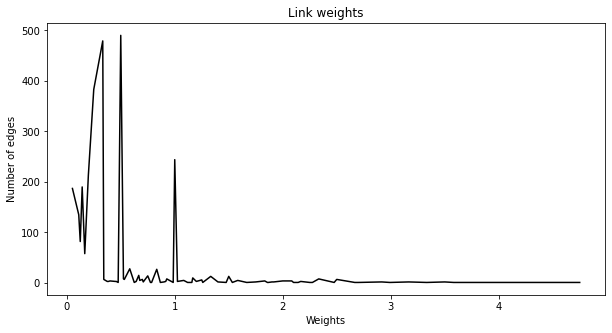

In [189]:
from collections import Counter
# Weight distribution
weights, counts = [], []

for k, v in Counter(sorted([edge[2].get('value', 1) for edge in G.edges(data=True)])).items():
  weights.append(k)
  counts.append(v)

plt.figure(figsize=(10,5))
plt.plot(weights, counts, '-', color='black', label = f'N={str(N)}')
plt.title('Link weights')
plt.xlabel('Weights')
plt.ylabel('Number of edges')
plt.show()

The network's links are weighted inversely according to the number of co-authors as follows [6]:

$w_{ij} = \sum_k\frac{d_i^k d_j^k}{n_k-1}$
* Where $n_k$ is the number of co-authors of paper $k$, excluding from the sums all single-author papers.
* $d_i^k$ is 1 if a scientist $i$ was a co-author of paper $k$
and zero otherwise.

## Giant component of the network

We extract the different components in the network and display them in function of nodes and edges.

Text(0.5, 1.0, 'Components in function of nodes')

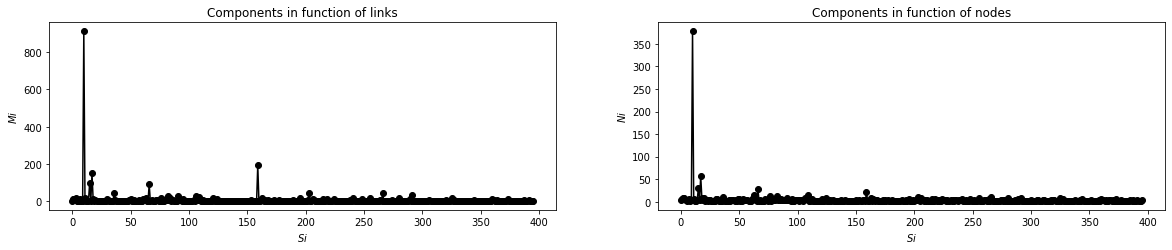

In [ ]:
component_list = [G.subgraph(c).copy() for c in nx.connected_components(G)]
  
plt.figure(figsize = (20, 20))
  
# Component sizes in function of edges
edges_list = [s.number_of_edges() for s in component_list]

plt.subplot(5, 2, 1)
plt.plot(range(len(component_list)), edges_list, '-o', color='black')
plt.xlabel('$Si$')
plt.ylabel('$Mi$')
plt.title('Components in function of links')

# Component sizes in function of nodes
nodes_list = [s.number_of_nodes() for s in component_list]

plt.subplot(5, 2, 2)
plt.plot(range(len(component_list)), nodes_list, '-o', color='black')
plt.xlabel('$Si$')
plt.ylabel('$Ni$')
plt.title('Components in function of nodes')

We can clearly see that the network contains one giant component (GC) which holds together the most links and nodes, the code below indicates that the GC contains **379** nodes and **914** edges.

In [ ]:
giant_c = max(component_list, key=len)
print(giant_c)

Graph with 379 nodes and 914 edges


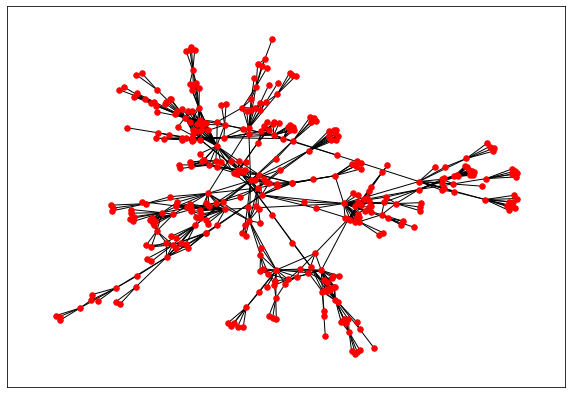

In [ ]:
# Visualize the GC: Giant Component
plt.figure(figsize = (10, 7))
index = [component_list.index(c) for c in component_list if c.number_of_nodes() > 370]
nx.draw_networkx(component_list[index[0]], pos=pos, node_size=30, node_color='red', with_labels=False)

Additionally, from the table below, we observe the count of each component size, we can see that we have 128 components of size 1 (isolates), 102 components of size 2 (dyadic isolates) and 166 components of size equal or superior than 3.

In [209]:
components_sizes = [len(c) for c in list(nx.connected_components(G))]
comp_df = pd.DataFrame.from_records(list(dict(Counter(components_sizes)).items()), columns=['Component size','Count'])
comp_df.sort_values(by=['Component size'], inplace=True)
comp_df

,Component size,Count
4,1,128
8,2,102
3,3,71
0,4,38
1,5,15
7,6,10
5,7,7
2,8,9
17,9,4
11,10,2


## Implementation
In this section, we explore the network’s ability to withstand the removal of either strong or weak ties by deleting links according to the increasing/decreasing order of their weights and of their overlap values.
We investigate the network's ability to tolerate the removal of the ties to better grasp the systemic or global consequences of this local relationship between tie strength and network topology. We estimate the relative size of the giant component $S_c$ to assess the impact of deleting edges [1].


### Weight-ordered link removal

The following function takes a network and the number of edges to remove as arguments, and returns the network after removing the edges.
We first get the edges of the weighted network and sort the edges based on their weights with the order specified as an argument $desc$ (*descending order if True*). We then remove the nodes and return the new network.

In [ ]:
def weight_edge_remove(network, m, desc=True):
  _net_copy = network.copy()
  _edges = _net_copy.edges(data=True)
  _sorted = sorted(_edges, key=lambda t: t[2].get('value', 1), reverse=desc)
  for edge in _sorted[:m]:
    e = tuple(list(edge)[0:2])
    _net_copy.remove_edge(*e)
  return _net_copy

The function below calculates the susceptibility of a network and returns it together with the largest component size.

The susceptibility $\chi$ is a quantity that measurs how sensitive is the system with respect to small perturbations that try to drive the system from one phase to the other, and this quantity has a sharp peak at the transition point (critical point). The transition can be given as 
$$
\chi = \sum_{s_i \neq s_{\rm max}} s_i^2 p(s),
$$
With:
$$
p(s) = N_s/Ncomp
$$
Where the summation runs over all the components except the largest one,  $s_i$ denotes the size of component $i$, and $p(s)$ is the component size distribution.
$N_s$ gives the number of components with size $s$ and $Ncomp$ is the overall number of components.

In [ ]:
def sensitivity_gc(network):
  _network_N = network.number_of_nodes()
  _comps = nx.connected_components(network)
  _comp_sizes = [len(_comp) for _comp in _comps]
  _sort_c_sizes = sorted(_comp_sizes,reverse=True)
  _lcs = _sort_c_sizes[0]/_network_N
  _chi = 0
  if len(_sort_c_sizes) > 1:
    _chi = sum([_sort_c_sizes[i]*_sort_c_sizes[i] for i in range(1,len(_sort_c_sizes))])
    return _chi/(len(_sort_c_sizes)), _lcs
  else:
    return _chi,_lcs

#### Decreasing weight order

In [ ]:
# Remove 10 links at a time
net_copy = G.copy()
step = 10

net_decr_S, net_decr_chi, net_decr_rm = [], [], []

net_decr_S.clear()
net_decr_chi.clear()
net_decr_rm.clear()

while (net_copy.number_of_edges() > 2*step):
  net_copy = weight_edge_remove(net_copy, step)
  chi, S = sensitivity_gc(net_copy)
  net_decr_rm.append(G.number_of_edges() - net_copy.number_of_edges())
  net_decr_chi.append(chi)
  net_decr_S.append(S)

#### Increasing weight order

In [ ]:
# Remove 10 links at a time
net_copy = G.copy()
step = 10

net_inc_S, net_inc_chi, net_inc_rm = [], [], []

net_inc_S.clear()
net_inc_chi.clear()
net_inc_rm.clear()

while (net_copy.number_of_edges() > 2*step):
  net_copy = weight_edge_remove(net_copy, step, desc=False)
  chi, S = sensitivity_gc(net_copy)
  net_inc_rm.append(G.number_of_edges() - net_copy.number_of_edges())
  net_inc_chi.append(chi)
  net_inc_S.append(S)

#### Compare GC size

|#| Removing links by weight order:


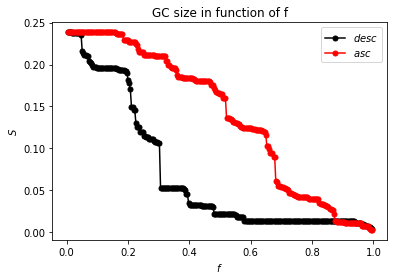

In [ ]:
print('|#| Removing links by weight order:')

# Component sizes in function of f
plt.figure(figsize = (6, 4))
net_f = [edge/M for edge in net_decr_rm] # net_decs_rm == net_inc_rm

# Decreasing order
plt.plot(net_f, net_decr_S, 'o-', color='black', markersize=5, label='$desc$')
# Increasing order
plt.plot(net_f, net_inc_S, 'o-', color='red', markersize=5, label='$asc$')

plt.xlabel('$f$')
plt.ylabel('$S$')

plt.title('GC size in function of f')

plt.legend(loc = 'upper right')

The graph above corresponds to the case in which the links are removed on the basis of their strengths. The control parameter $𝑓$ denotes the fraction of removed links. The black curves correspond to removing first the high-strength links, while the red curve starts with the weakest links. 

We observe that the removal of weak ties leads to smoother shrinkage of the giant component’s size. The removal of the strong ties drastically decreases the size of the giant component after $𝑓=0.2$ and leads to the network breakdown.

#### Compare Susceptibility

|#| Removing links by weight order:


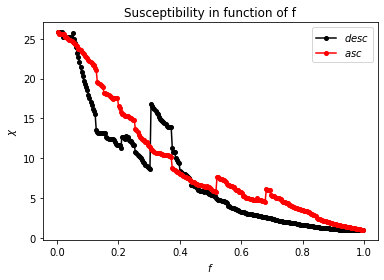

In [ ]:
print('|#| Removing links by weight order:')

# Component sizes in function of f
plt.figure(figsize = (6, 4))
net_f = [edge/M for edge in net_decr_rm] # net_decs_rm == net_inc_rm

# Decreasing order
plt.plot(net_f, net_decr_chi, 'o-', color='black', markersize=4, label='$desc$')
# Increasing order
plt.plot(net_f, net_inc_chi, 'o-', color='red', markersize=4, label='$asc$')

plt.xlabel('$f$')
plt.ylabel('$\chi$')

plt.title('Susceptibility in function of f')

plt.legend(loc = 'upper right')

We explained that susceptibility is expressed as large divergence close to transition points with respect to outside perturbations that drive the system towards another phase. 

If we start link removal with links with high weights, we observe a signature of divergence. In contrast, if we start removing links with low weights, the divergence is weak not as clear.

### Overlap-ordered link removal

In this section, I will try to remove links according to **increasing/decreasing order given by O**. The latter is the overlap between the neighbourhoods of the link endpoints <a href='https://www.pnas.org/content/pnas/104/18/7332.full.pdf'>[ref]</a>.

To calculate the relative topological overlap of the neighborhood of two users $v_i$ and $v_j$ we use:
$$
Oij = n(ij) / ((k_i - 1) + (k_j - 1) - n(ij))
$$
<br/>
Where $n(ij)$ is the number of common neighbors of $v_i$ and $v_j$, and $k_i$ $k_j$ denotes the degree of nodes $v_i$ $v_j$ respectively.
* If $v_i$ and $v_j$ have no common acquaintances, then
we have $O(ij)$ = 0
* If $v_i$ and $v_j$ are part of the same circle of friends, then
we have $O(ij)$ = 1

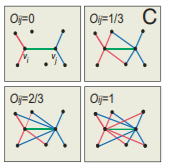

The function below takes a network as an argument and calculates the overlap between the neighbourhoods of each links endpoints. The mathematical foundation is given above.

In [ ]:
# Calculate overlap between linked nodes
def calculate_overlaps(network):
  _edges = list(network.edges())
  _overlaps = []

  for e in _edges:
    _neighbors = sorted(nx.common_neighbors(network, e[0], e[1]))
    if len(_neighbors) > 0:
      _overlap = len(_neighbors) / ((network.degree[e[0]] - 1) + (network.degree[e[1]] - 1) - len(_neighbors))
    else:
      _overlap = 0
    _overlaps.append(( *e, {'overlap': _overlap} ))
  return _overlaps

The following function removes edges between nodes based on the overlap value of each edge. It is possible to specify the order in which the overlap values will be sorted by changing the argument $desc$ (descending if True).

In [ ]:
def overlap_edge_remove(network, m, desc=True):
  _net_copy = network.copy()
  _edges = _net_copy.edges(data=True)
  _overlaps = calculate_overlaps(network)
  _sorted = sorted(_overlaps, key=lambda t: t[2].get('overlap', 1), reverse=desc)
  for edge in _sorted[:m]:
    e = tuple(list(edge)[0:2])
    _net_copy.remove_edge(*e)
  return _net_copy

#### Decreasing order

In [ ]:
# Remove 10 links at a time
net_copy = G.copy()
step = 10
i = 0

net_decr_S, net_decr_chi, net_decr_rm = [], [], []

net_decr_S.clear()
net_decr_chi.clear()
net_decr_rm.clear()

while (net_copy.number_of_edges() > 2*step):
  net_copy = overlap_edge_remove(net_copy, step)
  chi, S = sensitivity_gc(net_copy)
  net_decr_rm.append(G.number_of_edges() - net_copy.number_of_edges())
  net_decr_chi.append(chi)
  net_decr_S.append(S)

#### Increasing order

In [ ]:
# Remove 10 links at a time
net_copy = G.copy()
step = 10

net_decr_S, net_decr_chi, net_decr_rm = [], [], []

net_decr_S.clear()
net_decr_chi.clear()
net_decr_rm.clear()

while (net_copy.number_of_edges() > 2*step):
  net_copy = overlap_edge_remove(net_copy, step, False)
  chi, S = sensitivity_gc(net_copy)
  net_decr_rm.append(G.number_of_edges() - net_copy.number_of_edges())
  net_decr_chi.append(chi)
  net_decr_S.append(S)

#### Compare GC size

|#| Removing links by overlap order:


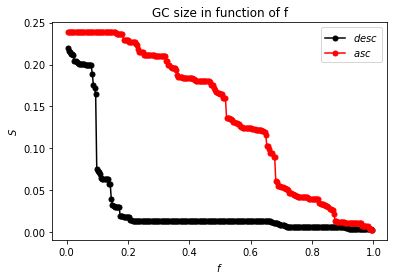

In [ ]:
print('|#| Removing links by overlap order:')

# Component sizes in function of f
plt.figure(figsize = (6, 4))
net_f = [edge/M for edge in net_decr_rm]

# Decreasing order
plt.plot(net_f, net_decr_S, 'o-', color='black', markersize=5, label='$desc$')
# Increasing order
plt.plot(net_f, net_inc_S, 'o-', color='red', markersize=5, label='$asc$')

plt.xlabel('$f$')
plt.ylabel('$S$')

plt.title('GC size in function of f')

plt.legend(loc = 'upper right')

The graph above corresponds to the case in which the links are removed on the basis of their overlap. The black curves correspond to removing first the links with the highest overlap, while the red curve starts with the lowest. 

The removal of weak links in accordance with the common neighbors between nodes $𝑢$ and $𝑣$ seems to be gradual. The removal of strong links show a noticeable decrease in the relative size of the GC. Which leads to a breakdown of the network.

#### Compare Susceptibility

|#| Removing links by overlap order:


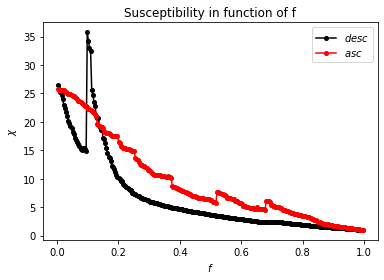

In [ ]:
print('|#| Removing links by overlap order:')

# Component sizes in function of f
plt.figure(figsize = (6, 4))
net_f = [edge/M for edge in net_decr_rm]

# Decreasing order
plt.plot(net_f, net_decr_chi, 'o-', color='black', markersize=4, label='$desc$')
# Increasing order
plt.plot(net_f, net_inc_chi, 'o-', color='red', markersize=4, label='$asc$')

plt.xlabel('$f$')
plt.ylabel('$\chi$')

plt.title('Susceptibility in function of f')

plt.legend(loc = 'upper right')

We notice that if we start link removal with links with high overlap values, we observe a sharp signature of divergence around $𝑓≈0.1$. In contrast, if we start removing links with the lowest overlap values, the divergence is weak and not as clear.

### Conclusion

Following the comparison between the relative giant component’s size in function of the control parameter $𝑓$ which indicates the fraction of removed edges in the network, we observe that the network is much more sensitive to the removal of the edges with the highest weight/overlap. This intuitive approach shows that the co-authorship weighted network is highly dependant on the stronger ties and their removal affects the integrity of the network and leads to a phase transition driven network collapse.

## References

[1]. J.-P. Onnela et al. Structure and tie strengths in mobile communication networks (2006).
[1]. M.E.J. Newman (2003): The structure and function of complex networks, SIAM Review 45, 167-256.<br/>

[2]. S. Boccaletti et al. (2006); , Complex networks: Structure and dynamics Physics Reports 424, 175-308.<br/>

[3]. M.E.J. Newman (2006): Finding community structure in networks using the eigenvectors of matrices, Preprint physics/0605087.<br/>

[4]. Kadushin, C., Understanding Social Networks: Theories, Concepts, and
Findings, Oxford University Press: New York, 2012

[5]. De Nooy, W., Mrvar, A. & Batagely, V., Exploratory Social Network
Analysis with Pajek, Cambridge University Press: Cambridge, 2011. 

[6] M.E.J. Newman, Phys. Rev. E 64, 016132, Scientific collaboration networks. II. Shortest paths, weighted networks, and centrality (2001).